<a href="https://colab.research.google.com/github/elnemr19/Pneumonia-Detection-CNN-/blob/main/Chest_X_Ray_Images_(Pneumonia)CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url = 'https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia'

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:33<00:00, 120MB/s]
100% 2.29G/2.29G [00:33<00:00, 74.0MB/s]


In [6]:
#!unzip /content/chest-xray-pneumonia.zip

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report ,roc_curve, auc ,precision_recall_curve ,roc_auc_score

import os
import cv2
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [9]:
train_path ='/content/chest_xray/train'
test_path ='/content/chest_xray/test'
labels =['NORMAL' ,'PNEUMONIA']

##preprocessing

NORMAL : Class number 0 , that contain 1341 image


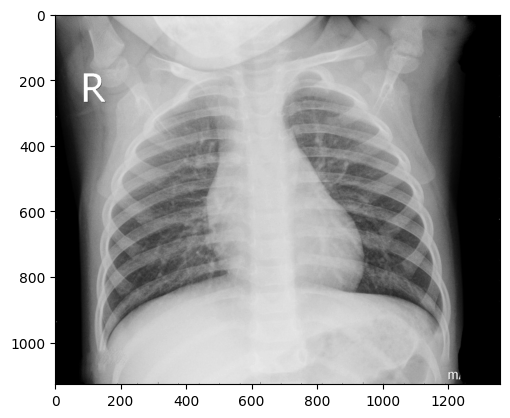

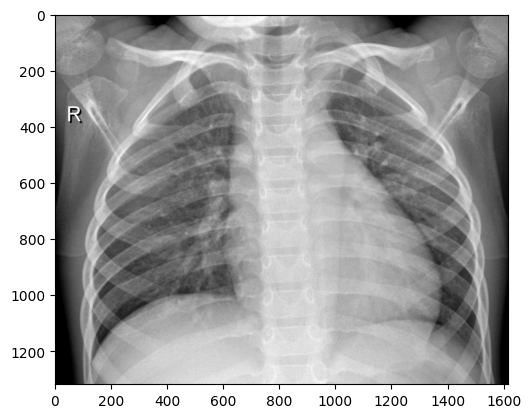

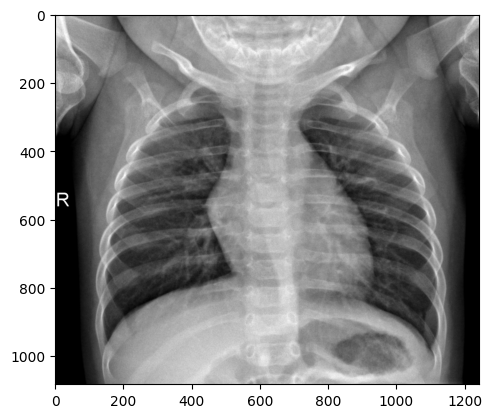

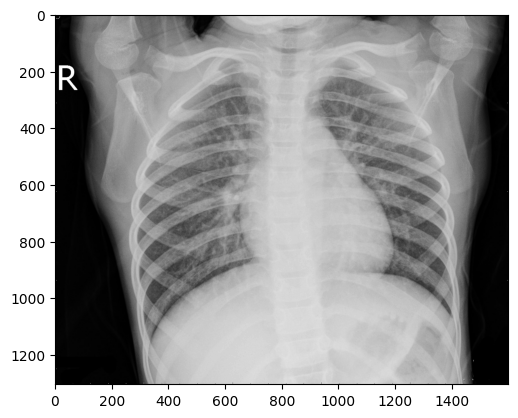

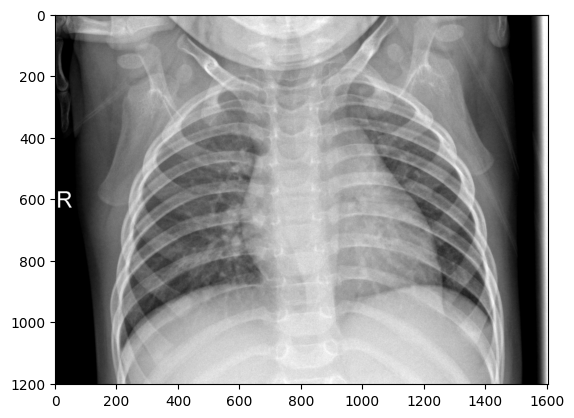

PNEUMONIA : Class number 1 , that contain 3875 image


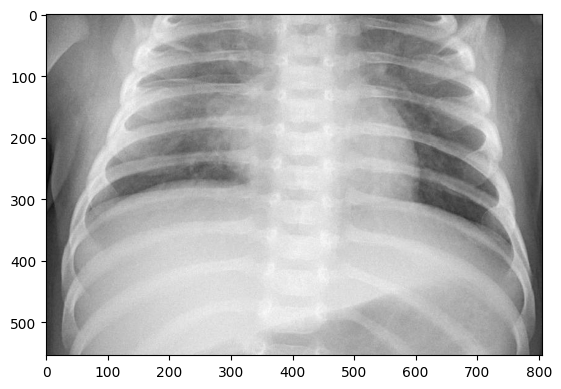

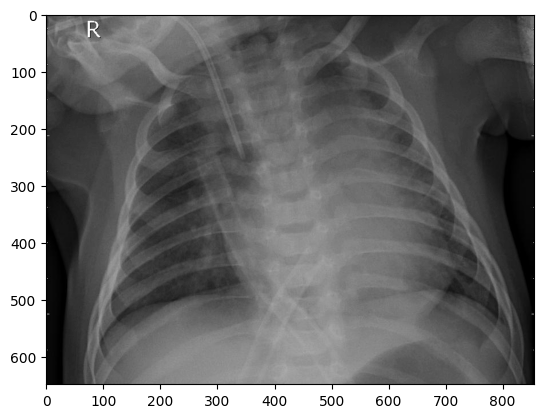

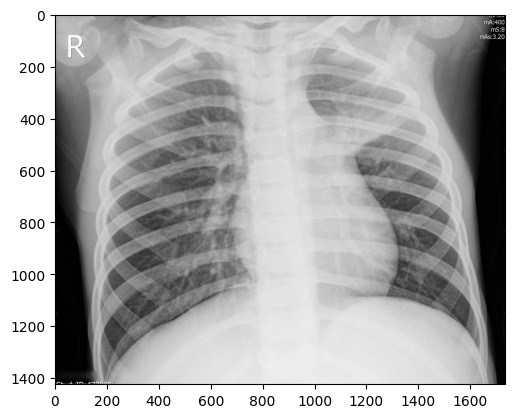

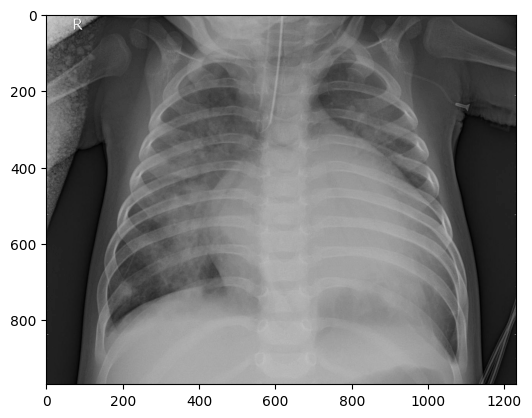

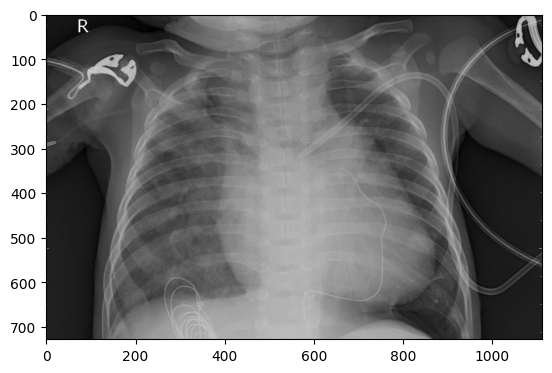

In [10]:
i =0
counts = {}

for label in labels :
    path =os.path.join(train_path ,label)
    counts[label] = len(os.listdir(path))
    x =0
    print(f'{label} : Class number {i} , that contain {len(os.listdir(path))} image')
    for img in os.listdir(path):
        x +=1
        img =cv2.imread(os.path.join(path ,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img ,cmap ='gray')
        plt.show()
        if x ==5 :
            print('==='*40)
            break
    i +=1

In [11]:
df = pd.DataFrame(list(counts.items()), columns=['Label', 'Count'])
df.set_index('Label', inplace=True)

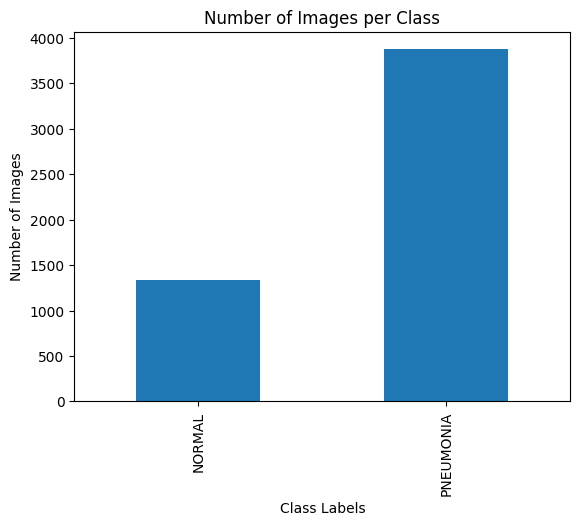

In [12]:
df.plot(kind='bar', legend=False)

plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.show()

In [13]:
print(img.shape)

(728, 1112)


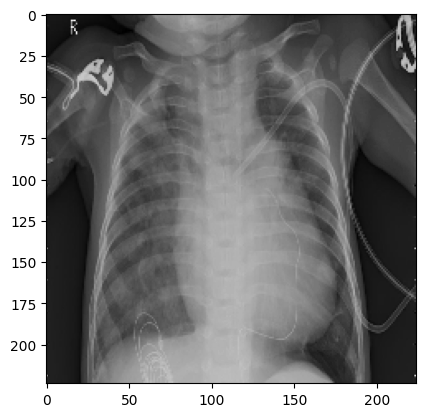

In [14]:
img_size =224

resized_img =cv2.resize(img ,(img_size ,img_size) ,1)
plt.imshow(resized_img ,cmap ='gray')
plt.show()

In [15]:
train_data =[]
test_data =[]

def creat_df(in_path ,data ):
    for label in labels :
        path =os.path.join(in_path ,label)
        class_num =labels.index(label)
        for img in tqdm(os.listdir(path)):
            try:
                img =cv2.imread(os.path.join(path ,img) ,cv2.IMREAD_GRAYSCALE )
                resized_img =cv2.resize(img ,(img_size ,img_size))
                data.append([resized_img ,class_num])

            except exception as e:
                pass



creat_df(train_path ,train_data)
creat_df(test_path ,test_data)

100%|██████████| 390/390 [00:01<00:00, 384.60it/s]


In [16]:
train_data[:5]

[[array([[116, 150, 129, ...,   0,   0,   0],
         [105, 110, 108, ...,   0,   0,   0],
         [ 84, 101,  99, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  2,   0,   0, ...,   0,   0,   0],
         [116,   0,   0, ...,   0,   0,   0]], dtype=uint8),
  0],
 [array([[149, 147, 145, ..., 133, 128, 137],
         [145, 142, 146, ..., 126, 122, 129],
         [151, 150, 148, ..., 128, 131, 128],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
  0],
 [array([[212, 242, 254, ..., 165, 240, 226],
         [215, 226, 248, ..., 213, 240, 219],
         [222, 226, 237, ..., 232, 220, 205],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
  0],
 [array([[141,   3,   3, ...,  17,   5,   0],
         [  1,   1, 1

In [17]:
import random

random.shuffle(train_data)
for sample in train_data[:10]:
    print(sample[1])

1
1
1
1
1
1
1
0
1
1


In [18]:

def X_y (data ,X ,y):
  for img ,label in data:
    img_resized = cv2.resize(img, (img_size, img_size))
    X.append(img_resized/255.)
    y.append(label)




X_train=[]
y_train=[]
X_test=[]
y_test=[]

X_y(train_data ,X_train ,y_train)
X_y(test_data ,X_test ,y_test)



X_train =np.array(X_train).reshape(-1, img_size ,img_size ,1)
y_train =np.array(y_train)

X_test =np.array(X_test).reshape(-1, img_size ,img_size ,1)
y_test =np.array(y_test)

In [19]:
print('X_train shape :' ,X_train.shape)
print('y_train shape :' ,y_train.shape)

print('X_test shape  :' ,X_test.shape)
print('y_test shape  :' ,y_test.shape)

X_train shape : (5216, 224, 224, 1)
y_train shape : (5216,)
X_test shape  : (624, 224, 224, 1)
y_test shape  : (624,)


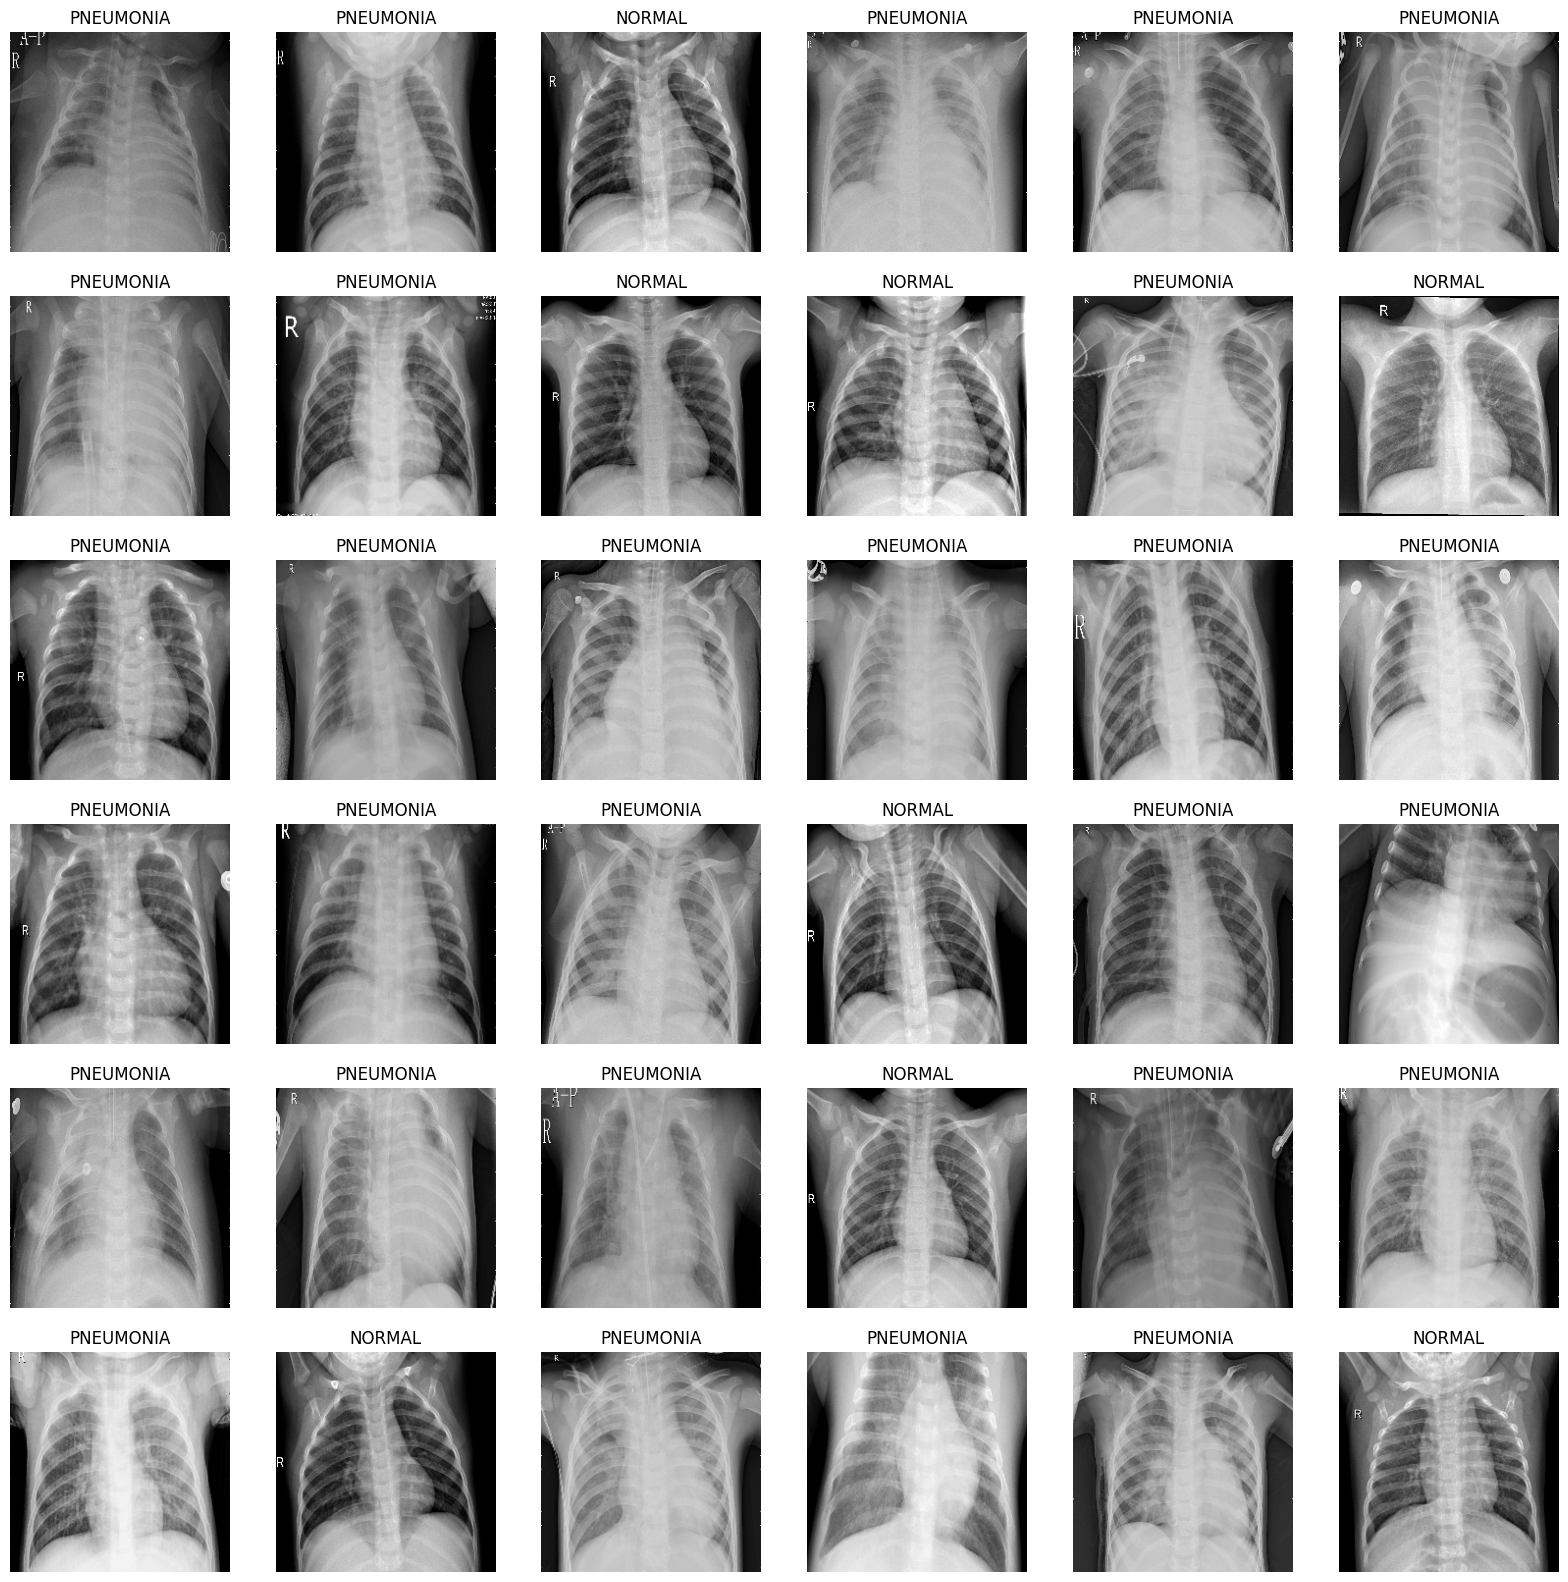

In [20]:
plt.figure(figsize=(20,20))

for n , i in enumerate(np.random.randint(0,len(X_train),36)) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i] ,cmap ='gray')
    plt.axis('off')
    plt.title(labels[y_train[i]])

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train.reshape(-1, img_size * img_size * 1), y_train)
X_train = X_train.reshape(-1, img_size, img_size, 1)



##Model

In [23]:
size = (img_size, img_size, 1)
num_classes = len(labels)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=size, kernel_regularizer=l2(0.005)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.005)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.005)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.005)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.005)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.005)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.005)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.005)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 107, 107, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 51, 51, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 49, 49, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,934,337 (7.38 MB)

 Trainable params: 1,934,337 (7.38 MB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

In [25]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30 , validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


243/243 ━━━━━━━━━━━━━━━━━━━━ 60s 185ms/step - accuracy: 0.5496 - loss: 3.0506 - val_accuracy: 0.7212 - val_loss: 1.5547
Epoch 2/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - accuracy: 0.7984 - loss: 1.3177 - val_accuracy: 0.8253 - val_loss: 0.9934
Epoch 3/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - accuracy: 0.8654 - loss: 0.8790 - val_accuracy: 0.8317 - val_loss: 0.8417
Epoch 4/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 35s 139ms/step - accuracy: 0.8942 - loss: 0.7142 - val_accuracy: 0.8478 - val_loss: 0.7641
Epoch 5/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 33s 133ms/step - accuracy: 0.9016 - loss: 0.6193 - val_accuracy: 0.8510 - val_loss: 0.6832
Epoch 6/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 43s 140ms/step - accuracy: 0.9025 - loss: 0.5691 - val_accuracy: 0.8221 - val_loss: 0.8020
Epoch 7/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 40s 138ms/step - accuracy: 0.9129 - loss: 0.5214 - val_accuracy: 0.8558 - val_loss: 0.6203
Epoch 8/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 33s 133ms/step - accuracy: 0.9113 - loss: 0.4986 - val

In [36]:
model.save('Pneumonia.keras')

##Evaluation

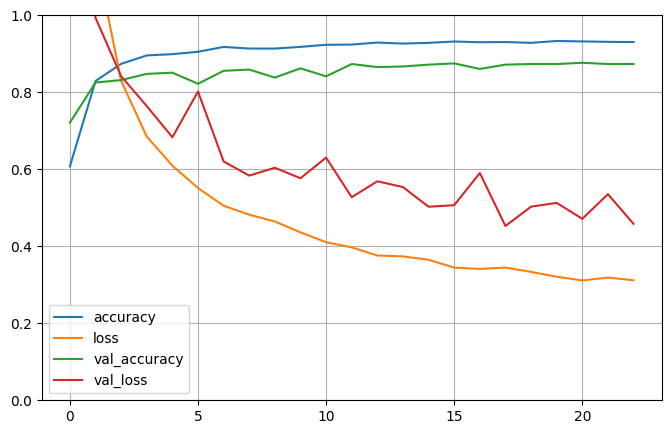

In [27]:
pd.DataFrame(history.history).plot(figsize=(8 ,5))
plt.grid(True)
plt.gca().set_ylim(0 ,1)
plt.show()

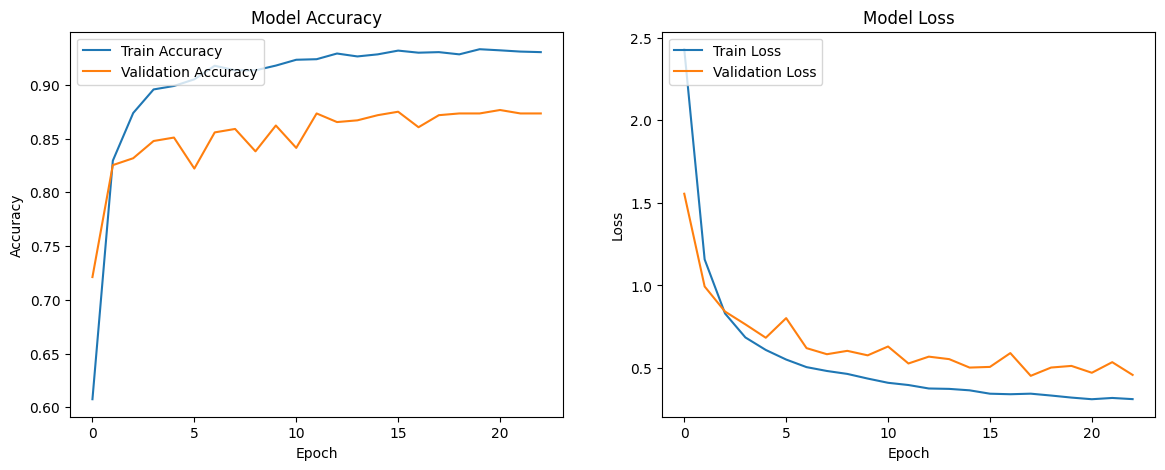

In [28]:
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


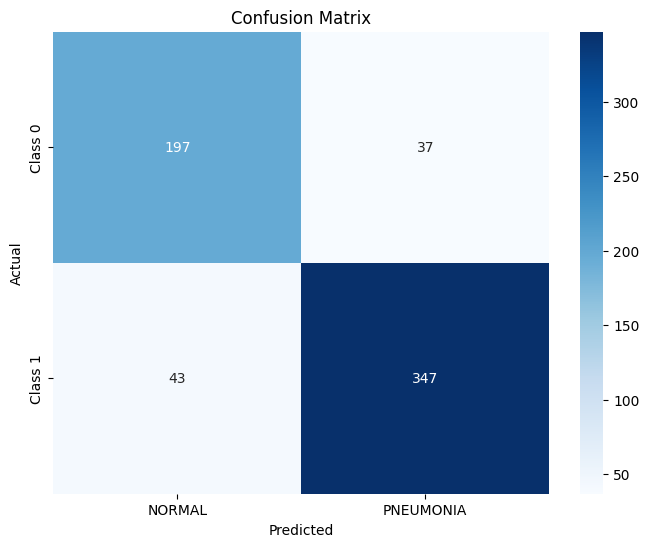

In [29]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_test = np.array(y_test).flatten()


conf_matrix = confusion_matrix(y_test, y_pred_classes)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [30]:
class_report = classification_report(y_test, y_pred_classes, target_names=labels)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.82      0.84      0.83       234
   PNEUMONIA       0.90      0.89      0.90       390

    accuracy                           0.87       624
   macro avg       0.86      0.87      0.86       624
weighted avg       0.87      0.87      0.87       624



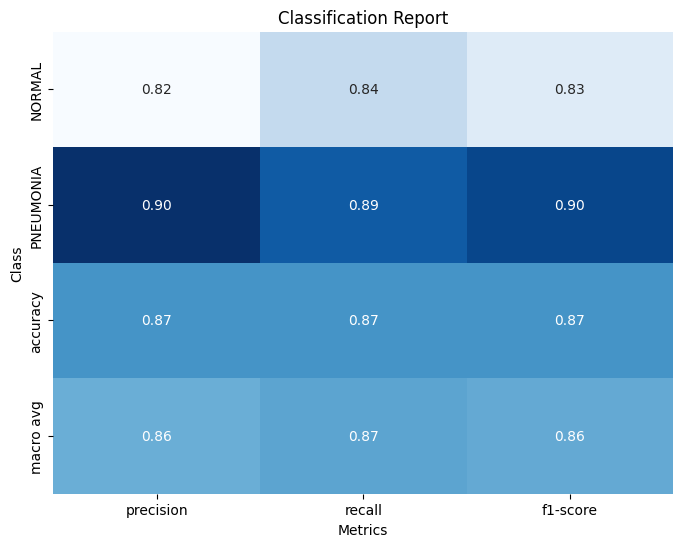

In [31]:
report = classification_report(y_test, y_pred_classes, target_names=['NORMAL' ,'PNEUMONIA'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report' )
plt.show()

In [32]:
roc_auc = roc_auc_score(y_test, y_pred_classes, multi_class='ovr')
print('ROC AUC:', roc_auc)

ROC AUC: 0.8658119658119657


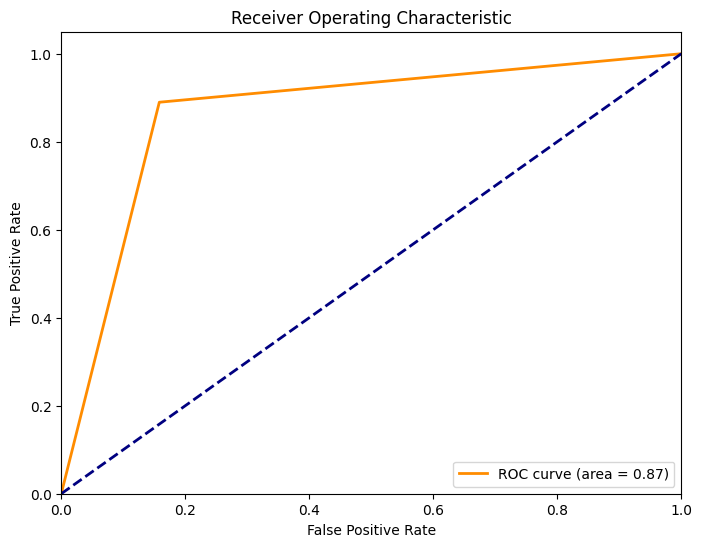

In [33]:
fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_classes.ravel())
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##Deployment

In [4]:
!pip install gradio

In [5]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

img_size = 224

model = tf.keras.models.load_model('Pneumonia.keras')

def predict_pneumonia(img):
    try:
        # Resize the image to the expected size
        img = img.resize((img_size, img_size))
        img_array = np.array(img)

        # Check the number of dimensions and adjust
        if img_array.ndim == 2:  # If grayscale
            img_array = np.expand_dims(img_array, axis=-1)
        elif img_array.ndim == 3 and img_array.shape[2] == 4:  # RGBA image
            img_array = img_array[:, :, :1]  # Convert to single channel grayscale

        # Ensure the shape is (224, 224, 1)
        if img_array.shape[-1] != 1:
            img_array = np.expand_dims(img_array, axis=-1)

        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = img_array / 255.0  # Normalize the image


        print(f"Image shape after resizing and preprocessing: {img_array.shape}")

        # Predict using the model
        prediction = model.predict(img_array)
        class_idx = (prediction > 0.5).astype(int)[0][0]

        return "NORMAL" if class_idx == 0 else "PNEUMONIA"
    except Exception as e:
        # Return the error message in case of exception
        return str(e)

# Gradio Interface
iface = gr.Interface(
    fn=predict_pneumonia,
    inputs=gr.Image(image_mode="L", type="pil"),  # Specify image mode for grayscale
    outputs="text",
    title="Chest X-ray Pneumonia Detection",
    description="Upload a chest X-ray image to detect if it's normal or pneumonia.",
)

# Launch the app
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://599ff9fbeb9a9d450f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
